# KMeans Clustering 클래스 구현

In [ ]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

In [ ]:
class KMeans:
    def __init__(self, k, tolerance = 1e-04, max_iter = 300):
        self.k = k
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.centroids = None
        self.clusters = None
        self.cluster_labels = None
        self.evaluation = None
        self.iter_num = None

    def fit(self, dataset):
      while True:
        try:
          X = np.array(dataset)

          # k개의 클러스터에 데이터 랜덤 할당
            # 각 데이터에 대해 랜덤한 클러스터 선택
          cluster_labels = np.random.choice(self.k, size=len(X))
            # 각 클러스터에 속하는 데이터들을 저장할 빈 리스트 생성
          clusters = [[] for _ in range(self.k)]

            # 모든 데이터에 대해, 해당하는 클러스터 리스트에 추가
          for i in range(len(X)):
              clusters[cluster_labels[i]].append(X[i])

            # numpy array로 변환
          clusters = [np.array(cluster) for cluster in clusters]

          centroids = self.Centroids(clusters)
          distance_sums = self.Distance_sums(clusters, centroids)
          evaluation = self.Evaluation(distance_sums)

          new_centroids = np.zeros(centroids.shape)
          iter_num = 0
          error = np.ones((self.k, X.shape[1]))

          while np.any(error != self.tolerance) and iter_num < self.max_iter:
              iter_num += 1

              clusters, cluster_labels = self.New_Cluster(X, centroids)
              new_centroids = self.Centroids(clusters)
              error = self.Error(centroids, new_centroids)
              centroids = deepcopy(new_centroids)

              distance_sums = self.Distance_sums(clusters, centroids)
              evaluation = self.Evaluation(distance_sums)

          self.centroids = centroids
          self.clusters = clusters
          self.cluster_labels = cluster_labels
          self.evaluation = evaluation
          self.iter_num = iter_num
        except ValueError as e:
          print("Error occurred:", e)
          print("Retrying the function...")
          continue

    # def Centroids(self, clusters):
    #     centroids = [np.mean(cluster, axis=0) for cluster in clusters]
    #     centroids = np.array(centroids)
    #     return centroids

    def Centroids(self, clusters):
      centroids = []
      for cluster in clusters:
          if len(cluster) > 0:
              centroids.append(np.mean(cluster, axis=0))
          else:
              # 빈 클러스터일 경우 임의의 값으로 대체하거나 건너뛸 수 있습니다.
              # 여기서는 NaN으로 설정합니다.
              centroids.append(np.nan)

      centroids = np.array(centroids)
      return centroids

    def Distance_sums(self, clusters, centroids):
        distance_sums = []

        for i in range(len(clusters)):
            cluster = clusters[i]
            centroid = centroids[i]

            if len(cluster.shape) == 1:
                distance_sum = np.sqrt(np.sum((cluster - centroid)**2))
            else:
                distance_sum = np.sum(np.sqrt(np.sum((cluster - centroid)**2, axis=1)))

            distance_sums.append(distance_sum)

        return distance_sums

    def Evaluation(self, distance_sums):
        evaluation = np.sum(distance_sums)
        return evaluation

    def New_Cluster(self, X, centroids):
        cluster_labels = np.zeros(len(X))
        new_clusters = [[] for _ in range(len(centroids))]

        for i, data in enumerate(X):
            distances = [np.sqrt(np.sum((data - centroid)**2)) for centroid in centroids]
            closest_centroid_index = np.argmin(distances)
            new_clusters[closest_centroid_index].append(data)
            cluster_labels[i] = closest_centroid_index

        new_clusters = [np.array(cluster) for cluster in new_clusters]
        return new_clusters, cluster_labels

    def Error(self, centroids, new_centroids):
        k = len(centroids)
        error = np.zeros((k, centroids.shape[1]))

        for i in range(k):
            error[i] = np.sqrt(np.sum((centroids[i] - new_centroids[i])**2))

        return error

  ###################################################################################

    def get_evaluation(self):
        return self.evaluation

    def get_clusters(self):
        return self.clusters

    def get_cluster_labels(self):
        return self.cluster_labels

    def get_centroids(self):
        return self.centroids

    def get_iteration_count(self):
        return self.iter_num


# KSA Clustering 구현

In [ ]:
# def neighborhood_cluster(clusters):
#     # 랜덤으로 클러스터 1개 선택
#     random_cluster_index = random.randint(0, len(clusters) - 1)

#     # 선택된 클러스터에서 랜덤으로 1개의 데이터 선택
#     random_data_index = random.randint(0, len(clusters[random_cluster_index]) - 1)
#     random_data = clusters[random_cluster_index][random_data_index]

#     # 원래 클러스터에서 데이터 삭제
#     clusters[random_cluster_index]  = np.delete(clusters[random_cluster_index], random_data_index, 0)

#     # 새로 넣을 클러스터를 랜덤으로 선택
#     new_random_cluster_index = random_cluster_index

#     # 현재 데이터의 클러스터와 다른 새로운 클러스터 선택
#     while new_random_cluster_index == random_cluster_index:
#         new_random_cluster_index = random.randint(0, len(clusters) - 1)

#     # 새로운 클러스터에 데이터 추가
#     clusters[new_random_cluster_index] = np.append(clusters[new_random_cluster_index], [random_data], axis = 0)

#     return clusters

In [ ]:
# 이웃해를 구하는 함수
def neighborhood_cluster(clusters):
    non_empty_clusters = []
    empty_clusters = []

    # 빈 클러스터에 대한 처리
    for i in range(len(clusters)):
      if len(clusters[i])==0:
        empty_clusters.append(clusters[i])
      else:
        non_empty_clusters.append(clusters[i])

    # 랜덤으로 클러스터 1개 선택
    random_cluster_index = random.randint(0, len(non_empty_clusters)-1)

    # 선택된 클러스터에서 랜덤으로 1개의 데이터 선택
    random_data_index = random.randint(0, len(non_empty_clusters[random_cluster_index]) - 1)
    random_data = non_empty_clusters[random_cluster_index][random_data_index]

    # 원래 클러스터에서 데이터 삭제
    non_empty_clusters[random_cluster_index]  = np.delete(non_empty_clusters[random_cluster_index], random_data_index, 0)

    # 이전에 선택한 클러스터를 제외한 다른 클러스터를 선택하기 위한 처리
    available_clusters = []
    if len(empty_clusters) > 0:  # 빈 클러스터가 있던 경우
      available_clusters.append(empty_clusters)
      for cluster in non_empty_clusters:
        if cluster is not non_empty_clusters[random_cluster_index]:  # 이전에 선택한 클러스터는 제외
          available_clusters.append(cluster)
    else:
      for cluster in non_empty_clusters:
        if cluster is not non_empty_clusters[random_cluster_index]:  # 이전에 선택한 클러스터는 제외
          available_clusters.append(cluster)

    # 새로 넣을 클러스터를 랜덤으로 선택
    new_random_cluster_index = random.randint(0, len(available_clusters)-1)

   # 새로운 클러스터에 데이터 추가
    available_clusters[new_random_cluster_index] = np.append(available_clusters[new_random_cluster_index], [random_data], axis = 0)

    # 이전 클러스터를 클러스터 리스트에 추가
    available_clusters.append(non_empty_clusters[random_cluster_index])

    # 클러스터 갱신
    clusters = available_clusters

    return clusters

In [ ]:
def Centroids(clusters):
    centroids = []
    for cluster in clusters:
        if len(cluster) > 0:
            centroids.append(np.mean(cluster, axis=0))
        else:
            # 빈 클러스터일 경우 임의의 값으로 대체하거나 건너뛸 수 있습니다.
            # 여기서는 NaN으로 설정합니다.
            centroids.append(np.nan)

    centroids = np.array(centroids)
    return centroids

def Distance_sums(clusters, centroids):
    distance_sums = []

    for i in range(len(clusters)):
        cluster = clusters[i]
        centroid = centroids[i]

        if len(cluster.shape) == 1:
            distance_sum = np.sqrt(np.sum((cluster - centroid)**2))
        else:
            distance_sum = np.sum(np.sqrt(np.sum((cluster - centroid)**2, axis=1)))

        distance_sums.append(distance_sum)

    return distance_sums

def Evaluation(distance_sums):
    evaluation = np.sum(distance_sums)
    return evaluation

def evaluate_solution(clusters):
    return Evaluation(Distance_sums(clusters, Centroids(clusters)))

In [ ]:
def KSA_Clustering(k, dataset, max_iter = 300, initial_temperature = 100, delta_t = 0.01, final_temperature = 1e-04, t = 2000):
  while True:
    try:
      T = initial_temperature
      kmeans = KMeans(k)
      kmeans.fit(dataset)
      best_solution = kmeans.get_clusters()  # 초기 clusters는 kmeans의 결과 clusters
      iterations = 0
      best_solution_evaluation = kmeans.get_evaluation()  # 초기 best_solution은 처음 kmeans를 돌린 평가값
      evaluations = []

      while T >= final_temperature and iterations <= max_iter:
          # 이웃해 생성
          for i in range(t):
              neighbor_solution = neighborhood_cluster(best_solution)

              # 이웃해 평가
              neighbor_solution_evaluation = evaluate_solution(neighbor_solution)

              # 좋은 이웃해는 항상 받아들임
              if neighbor_solution_evaluation < best_solution_evaluation:
                  best_solution = neighbor_solution
                  best_solution_evaluation = neighbor_solution_evaluation

              # 나쁜 해는 확률적으로 받아들임
              elif random.uniform(0, 1) < np.exp((best_solution_evaluation - neighbor_solution_evaluation) / T):
                  best_solution = neighbor_solution
                  best_solution_evaluation = neighbor_solution_evaluation

          # 온도 감소
          T -= delta_t
          iterations += 1
          evaluations.append(best_solution_evaluation)

      # 시각화
      plt.plot(range(0, iterations), evaluations, marker='o', linestyle='-')
      plt.title('Evaluation over Iterations')
      plt.xlabel('Iteration')
      plt.ylabel('Evaluation')
      plt.grid(True)
      plt.show()

      # 중심점
      best_centorids = Centroids(best_solution)

      return best_solution, best_solution_evaluation, best_centorids, iterations

    except ValueError as e:
      print("Error occurred:", e)
      print("Retrying the function...")
      continue

# 실험 및 결과

### iris dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
iris = pd.read_table("/content/drive/MyDrive/지능형알고리즘/UCI example data/iris.txt", sep=" ")

Error occurred: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.
Retrying the function...
Error occurred: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.
Retrying the function...
Error occurred: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.
Retrying the function...
Error occurred: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.
Retrying the function...


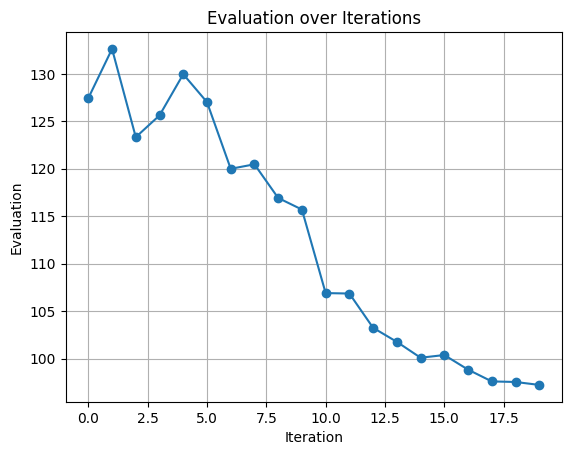

Final Evaluation: 97.22212765100771
Final Centroids: [[5.006      3.418      1.464      0.244     ]
 [6.82307692 3.06666667 5.72564103 2.07948718]
 [5.90327869 2.74754098 4.38196721 1.41803279]]
Total Iterations: 20


In [ ]:
k = 3
dataset = iris
max_iter = 300
initial_temperature = 1
delta_t = 0.05
final_temperature = 1e-04
t = 1500
clusters, evaluation, centroids, iterations = KSA_Clustering(k, dataset, max_iter, initial_temperature, delta_t, final_temperature, t)

# print("Final Clusters:")
# print(clusters)
print("Final Evaluation:", evaluation)
# print("Final Cluster Labels:", sa_kmeans.get_cluster_labels())
print("Final Centroids:", centroids)
print("Total Iterations:", iterations)


### wine dataset

In [ ]:
wine = pd.read_table("/content/drive/MyDrive/지능형알고리즘/UCI example data/wine.txt", sep=" ")

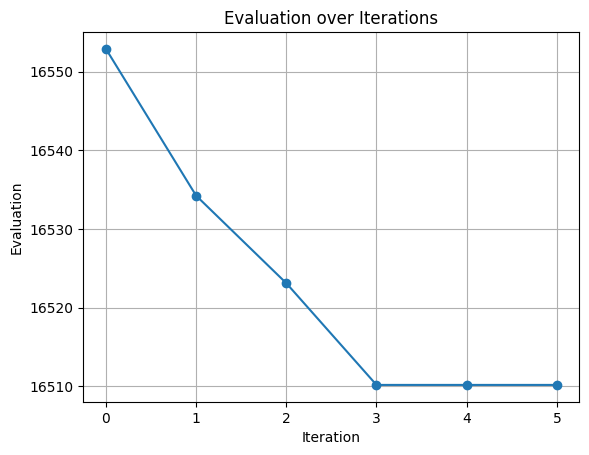

Final Evaluation: 16510.196677408763
Final Centroids: [[9.22205882e+01 2.06705882e+00 1.77544118e+00 3.88088235e-01
  1.46132353e+00 4.07470587e+00 9.41911765e-01 2.49573529e+00
  4.56294118e+02]
 [1.02612903e+02 2.10822581e+00 1.55709677e+00 3.91774194e-01
  1.46354839e+00 5.68774194e+00 8.79612903e-01 2.35774194e+00
  7.22741935e+02]
 [1.06687500e+02 2.85958333e+00 2.99875000e+00 2.86041667e-01
  1.93895833e+00 5.63791667e+00 1.08000000e+00 3.10395833e+00
  1.18977083e+03]]
Total Iterations: 6


In [ ]:
k = 3
dataset = wine
max_iter = 300
initial_temperature = 6
delta_t = 1
final_temperature = 1e-04
t = 1780
clusters, evaluation, centroids, iterations = KSA_Clustering(k, dataset, max_iter, initial_temperature, delta_t, final_temperature, t)

# print("Final Clusters:")
# print(clusters)
print("Final Evaluation:", evaluation)
# print("Final Cluster Labels:", sa_kmeans.get_cluster_labels())
print("Final Centroids:", centroids)
print("Total Iterations:", iterations)


### glass dataset

In [ ]:
glass = pd.read_table("/content/drive/MyDrive/지능형알고리즘/UCI example data/glass.txt", sep=" ")

Error occurred: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.
Retrying the function...
Error occurred: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.
Retrying the function...
Error occurred: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.
Retrying the function...


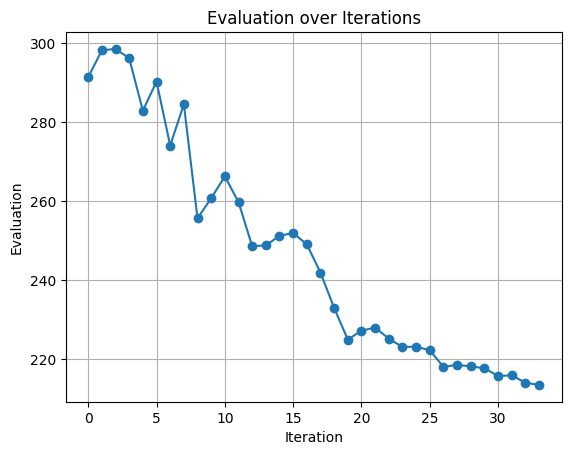

Final Evaluation: 213.41597074463465
Final Centroids: [[1.51318500e+00 1.30100000e+01 0.00000000e+00 3.03000000e+00
  7.05900000e+01 6.21000000e+00 6.94500000e+00 0.00000000e+00
  0.00000000e+00]
 [1.52826714e+00 1.18671429e+01 0.00000000e+00 1.21857143e+00
  7.16728571e+01 2.51428571e-01 1.43157143e+01 4.50000000e-01
  1.37142857e-01]
 [1.52013529e+00 1.31335294e+01 5.72941176e-01 1.48647059e+00
  7.30682353e+01 5.01764706e-01 1.10052941e+01 1.41176471e-02
  6.17647059e-02]
 [1.51657593e+00 1.47159259e+01 2.27037037e-01 2.09888889e+00
  7.32070370e+01 7.96296296e-02 8.58148148e+00 1.01259259e+00
  1.44444444e-02]
 [1.52136559e+00 1.38408824e+01 3.38764706e+00 1.02441176e+00
  7.18314706e+01 1.82647059e-01 9.57852941e+00 3.14705882e-02
  4.94117647e-02]
 [1.51724157e+00 1.31417323e+01 3.49165354e+00 1.40039370e+00
  7.27825984e+01 5.92913386e-01 8.33251969e+00 4.45669291e-02
  6.39370079e-02]]
Total Iterations: 34


In [ ]:
k = 6
dataset = glass
max_iter = 300
initial_temperature = 1
delta_t = 0.03
final_temperature = 1e-04
t = 2140
clusters, evaluation, centroids, iterations = KSA_Clustering(k, dataset, max_iter, initial_temperature, delta_t, final_temperature, t)

# print("Final Clusters:")
# print(clusters)
print("Final Evaluation:", evaluation)
# print("Final Cluster Labels:", sa_kmeans.get_cluster_labels())
print("Final Centroids:", centroids)
print("Total Iterations:", iterations)


### vowel dataset

In [ ]:
vowel = pd.read_table("/content/drive/MyDrive/지능형알고리즘/UCI example data/vowel.txt", sep=" ")

Error occurred: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.
Retrying the function...


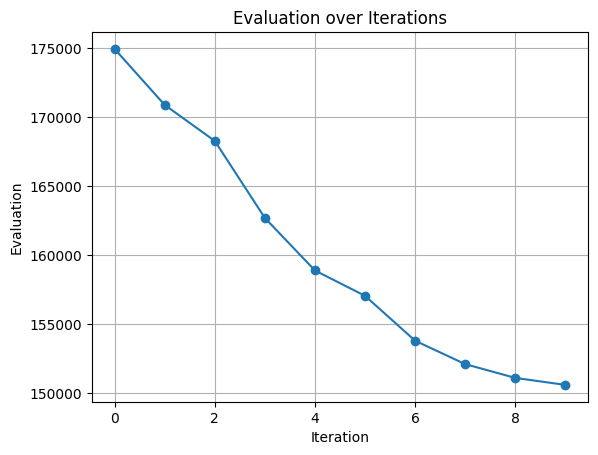

Final Evaluation: 150590.9570138252
Final Centroids: [[ 471.38888889 1962.38888889 2599.        ]
 [ 404.51612903 1029.67741935 2327.41935484]
 [ 367.4        2273.33333333 2913.4       ]
 [ 531.86813187 1528.02197802 2446.26373626]
 [ 448.17142857  999.77142857 2666.91428571]
 [ 669.16666667 1262.08333333 2297.91666667]]
Total Iterations: 10


In [ ]:
k = 6
dataset = vowel
max_iter = 300
initial_temperature = 100
delta_t = 10
final_temperature = 1e-04
t = 8710
clusters, evaluation, centroids, iterations = KSA_Clustering(k, dataset, max_iter, initial_temperature, delta_t, final_temperature, t)

# print("Final Clusters:")
# print(clusters)
print("Final Evaluation:", evaluation)
# print("Final Cluster Labels:", sa_kmeans.get_cluster_labels())
print("Final Centroids:", centroids)
print("Total Iterations:", iterations)


Error occurred: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.
Retrying the function...
Error occurred: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.
Retrying the function...
Error occurred: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.
Retrying the function...


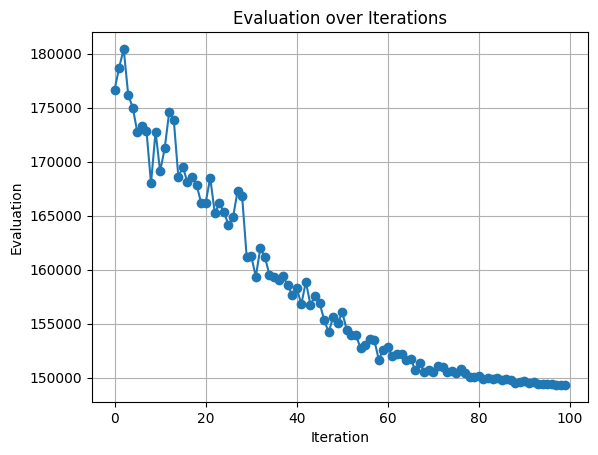

Final Evaluation: 149332.31430808967
Final Centroids: [[ 618.64864865 1320.27027027 2345.18918919]
 [ 368.86792453 2298.11320755 2986.41509434]
 [ 388.92857143 2141.33928571 2673.03571429]
 [ 445.05681818  993.80681818 2664.82954545]
 [ 404.08163265 1027.21088435 2320.74829932]
 [ 516.89655172 1832.4137931  2556.48275862]]
Total Iterations: 100


In [ ]:
k = 6
dataset = vowel
max_iter = 300
initial_temperature = 100
delta_t = 1
final_temperature = 1e-04
t = 8710
clusters, evaluation, centroids, iterations = KSA_Clustering(k, dataset, max_iter, initial_temperature, delta_t, final_temperature, t)

# print("Final Clusters:")
# print(clusters)
print("Final Evaluation:", evaluation)
# print("Final Cluster Labels:", sa_kmeans.get_cluster_labels())
print("Final Centroids:", centroids)
print("Total Iterations:", iterations)


### cloud dataset

In [ ]:
cloud = pd.read_table("/content/drive/MyDrive/지능형알고리즘/UCI example data/cloud.txt", sep=" ")

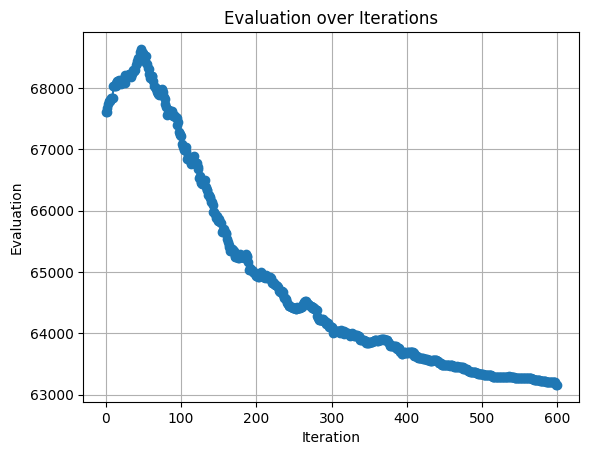

Final Evaluation: 63157.336553888475
Final Centroids: [[5.78125000e+00 2.14843750e+02 7.54591156e+01 1.33278125e-01
  2.01664216e+03 2.02562500e-02 4.19517500e+00 1.64750000e+02
  2.44781250e+02 2.09620978e+02]
 [8.90265487e+00 1.39991150e+02 4.30118973e+01 5.31300885e-02
  3.87238442e+02 5.53433628e-02 3.40460619e+00 1.78504425e+02
  2.40345133e+02 2.20730643e+02]
 [7.41880342e+00 1.70846154e+02 6.28061573e+01 8.60068376e-02
  8.61195839e+02 2.79820513e-02 3.85648803e+00 1.64444444e+02
  2.40683761e+02 2.08841783e+02]
 [8.58333333e+00 1.92250000e+02 7.44350967e+01 1.07451667e-01
  1.32532103e+03 2.47750000e-02 4.02393500e+00 1.63500000e+02
  2.40633333e+02 2.05193495e+02]
 [6.91262136e+00 1.65233010e+02 5.36766515e+01 7.45320388e-02
  6.99399634e+02 3.83640777e-02 3.70564175e+00 1.65019417e+02
  2.41679612e+02 2.14116060e+02]
 [7.86915888e+00 1.49177570e+02 4.87283505e+01 6.58841121e-02
  5.42668051e+02 3.97616822e-02 3.61934673e+00 1.71056075e+02
  2.40682243e+02 2.16576523e+02]
 [7.

In [ ]:
k = 10
dataset = cloud
max_iter = 800
initial_temperature = 15
delta_t = 0.025
final_temperature = 1e-04
t = 250
clusters, evaluation, centroids, iterations = KSA_Clustering(k, dataset, max_iter, initial_temperature, delta_t, final_temperature, t)

# print("Final Clusters:")
# print(clusters)
print("Final Evaluation:", evaluation)
# print("Final Cluster Labels:", sa_kmeans.get_cluster_labels())
print("Final Centroids:", centroids)
print("Total Iterations:", iterations)
